In [75]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import pandas as pd
import os
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

## Data Scrapping

- To save time, we will take the data between 1400 - 1439 for all months (Data seems huge, some years will be droped).
- Scraping code is taking chunks (1-20, 21- 40 ... changing the chunks manually).


In [76]:
url = 'https://services.amana-md.gov.sa/eservicesite/Inq/DeathInquiry.aspx'

# create a new Firefox session
driver = webdriver.Chrome('D:/Documents/GitHub/SCFHS-Challenge/chromedriver.exe')
driver.implicitly_wait(10)
driver.get(url)
urls = []

In [77]:
from selenium.webdriver.support.ui import Select


select_from_d = Select(driver.find_element_by_id('ctl00_ContentPlaceHolder1_cboDFrom'))
select_from_m = Select(driver.find_element_by_id('ctl00_ContentPlaceHolder1_cboMFrom')) 
select_from_y = Select(driver.find_element_by_id('ctl00_ContentPlaceHolder1_cboYFrom'))  

select_to_d = Select(driver.find_element_by_id('ctl00_ContentPlaceHolder1_cboDTo'))
select_to_m = Select(driver.find_element_by_id('ctl00_ContentPlaceHolder1_cboMTo')) 
select_to_y = Select(driver.find_element_by_id('ctl00_ContentPlaceHolder1_cboYTo'))  


    
#     select_from_d.select_by_visible_text('01')
select_from_d.select_by_value('25')
select_from_m.select_by_value('09')
select_from_y.select_by_value('1439')

select_to_d.select_by_value('30')
select_to_m.select_by_value('09')
select_to_y.select_by_value('1439')

driver.find_element_by_id('ctl00_ContentPlaceHolder1_btnSubmit').click()


In [78]:
table = driver.find_elements_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_dgDeath"]/tbody/tr/*')
# deleting the head and the last row for iteration
table = table[1:len(table) -1]


In [79]:
# devide the list by the number of feature per rows (5)
n = 5
table = [table[i:i + n] for i in range(0, len(table), n)]

In [80]:
names = []
sex = []
nationality = []
age = []
date_of_death = []

In [81]:
pages = driver.find_elements_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_dgDeath"]/tbody/tr[78]/td/a')


In [82]:
# driver.find_element_by_link_text('1').click()

In [83]:
len(driver.find_elements_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_dgDeath"]/tbody/tr[78]/td/a'))

1

In [ ]:
table_ = []
death = []
i = 0
chunk = 1
first = True
nextt = True
while nextt:
    try:
        #Selenium hands the page source to Beautiful Soup
        soup_level1= BeautifulSoup(driver.page_source, 'lxml')
        death.append(soup_level1)

        page_ = driver.find_elements_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_dgDeath"]/tbody/tr[78]/td/a')[i]
#         print('Current page :', driver.find_elements_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_dgDeath"]/tbody/tr[78]/td/span')[0].text)
#         print('Length of pages list : ', len(death))
#         print('Click ', page_.text)
#         print()
        if page_.text != '...':
            driver.find_element_by_link_text(page_.text).click()
        
    except:
        
        pass
    
    i += 1
    
    if (i > 19) & (first == True):
        # in the first iter, from 0 to 18 (len is 20)
        driver.find_element_by_link_text('...').click()
        first = False
        i = 1
    elif (i > 20) & (first == False):
        driver.find_elements_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_dgDeath"]/tbody/tr[78]/td/a')[-1].click()
        i = 1
    else: 
        pass
    
    
    if len(driver.find_elements_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_dgDeath"]/tbody/tr[78]/td/a')) < 21 & (first == False):
        nextt = False
        break

In [ ]:
i = 0
for table in death:
    table = table.find('table', {'id': 'ctl00_ContentPlaceHolder1_dgDeath'})
    table = table.findAll('tr')
    table = table[2::]
#     table = [table[i:i + n] for i in range(0, len(table), n)]
    for tr in table:
        try:
            names.append(tr.findAll('td')[0].text.strip())

        except:
            names.append('NA')
        
        try:
            sex.append(tr.findAll('td')[1].text.strip())
            
        except:
            sex.append('NA')
        
        try:
            nationality.append(tr.findAll('td')[2].text.strip())
        except:
            nationality.append('NA')
        
        try:
            age.append(tr.findAll('td')[3].text.strip())
        except:
            age.append('NA')
        
        try:
            date_of_death.append(tr.findAll('td')[4].text.strip())
        except:
            date_of_death.append('NA')
        

In [31]:
# Export the dataframe

df = pd.DataFrame({'name': names, 'sex': sex, 'nationality': nationality, 'age': age, 'date_of_death': date_of_death})
df.to_csv('part1.csv',  encoding='utf-8-sig')

In [85]:
# Due to the long of scrapping, dataset devided into some datasets.
# load all dataset, 
filenames = ['15yrs-part1.csv', '15yrs-part2.csv', '15yrs-part3.csv', '15yrs-part4.csv', '15yrs-part5.csv']
dfs = [pd.read_csv(filename,) for filename in filenames]
# dfs[0].join(dfs[1:])
df_merge = pd.concat(dfs, axis=0)

# pd.join(first, scnd, third, forth, fifth, sixth)

# Data cleaning

- Check missing values, drop missing in date only since it's the most important thing.

In [86]:
# Show all NaN
df_merge[pd.isnull(df_merge).any(axis=1)] 

# Check missing in Date only
df_merge['date_of_death'].isnull().any() 
df_merge[pd.isnull(df_merge['date_of_death'])][:5]

,Unnamed: 0,name,sex,nationality,age,date_of_death
75,75,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,NaN,NaN,NaN,NaN
151,151,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,NaN,NaN,NaN,NaN
227,227,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,NaN,NaN,NaN,NaN
303,303,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,NaN,NaN,NaN,NaN
379,379,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,NaN,NaN,NaN,NaN


In [87]:
# Drop Nan in date

import numpy as np
df_merge.dropna(subset=['date_of_death'], inplace=True)

df_merge[df_merge['date_of_death'] == np.nan]

,Unnamed: 0,name,sex,nationality,age,date_of_death


In [88]:
# Drop unnecessary columns
df_merge.columns
df_merge.drop(['Unnamed: 0'], axis=1, inplace=True)

In [89]:
# Can't convert it to datetime type because it's out of range (1600 is the limit)
# df_merge['date_of_death'] = pd.to_datetime(df_merge.date_of_death)


In [90]:
# Check for duplicates, i'll drop duplicate by name and date since we have many similiarities in name in saudi arabia.

df_merge[df_merge.duplicated(['name', 'date_of_death'])] # duplicates are 394
df_merge.drop_duplicates(inplace=True)
df_merge[df_merge.duplicated()]

,name,sex,nationality,age,date_of_death


In [91]:
# Export the cleaned df

# df_merge.to_csv('29-39-full.csv',  encoding='utf-8-sig')
# df_merge = pd.read_csv('29-39-full.csv')

# Feature engineering

In [92]:
# I will extract (y, m) manually

df_merge['year'] = df_merge['date_of_death'].apply(lambda x: x.split('/')[0])
df_merge['month'] = df_merge['date_of_death'].apply(lambda x: x.split('/')[1])
df_merge['day'] = df_merge['date_of_death'].apply(lambda x: x.split('/')[2])


df_merge.month.replace({'01': 1, '02': 2, '03':3, '04':4,'05':5 ,'06':6, '07':7,'08':8, '09': 9 }, inplace=True)
df_merge.day.replace({'01': 1, '02': 2, '03':3, '04':4,'05':5 ,'06':6, '07':7,'08':8, '09': 9 }, inplace=True)


df_merge['year'] = df_merge['year'].astype('int32')
df_merge['month'] = df_merge['month'].astype('int32')
df_merge['day'] = df_merge['day'].astype('int32')

In [93]:
df_merge.month.value_counts()

12    6696
4     6480
1     6366
9     6335
11    6191
5     6033
3     5901
6     5875
10    5835
8     5776
7     5767
2     5336
Name: month, dtype: int64

In [94]:
len(df_merge)

72591

In [95]:
df_merge[df_merge.duplicated()]

,name,sex,nationality,age,date_of_death,year,month,day


# EDA

In [96]:
# Max deaths happend in which month of each year?
# Expected result should be near one if deaths across months are equals.
# df_max = df_merge.groupby(['year', 'month'], as_index=False).sum()
# df_merge.year.unique()

years = []
months = []
count = []

s = 0
e = 12
df_merge['count'] = 1
for year in range(round(len(df_merge.groupby(['year', 'month'])['count'].sum()) / 12)):
    dd = df_merge.groupby(['year', 'month'], as_index=False)['count'].sum()[s:e]
#     display(dd[dd['count'] == dd['count'].values.max()])
    years.append(dd[dd['count'] == dd['count'].values.max()]['year'].values[0])
    months.append(dd[dd['count'] == dd['count'].values.max()]['month'].values[0])
    count.append(dd[dd['count'] == dd['count'].values.max()]['count'].values[0])
    s += 12
    e += 12

In [97]:
df_count = pd.DataFrame({'year': years, 'month': months, 'count': count})

In [98]:
df_count

,year,month,count
0,1425,12,479
1,1426,12,485
2,1427,12,499
3,1428,1,480
4,1429,12,438
5,1430,1,345
6,1431,12,468
7,1432,9,463
8,1433,9,515
9,1434,9,480


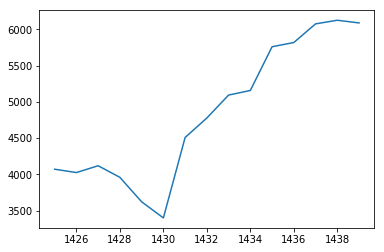

In [99]:
# No of deaths by year (line plot)

plt.plot(df_merge.groupby(['year']).sum()['count']);

In [143]:
# Average deaths per month (No/11), and No of death in Shaban 

df_merge_shaban = df_merge[df_merge['month'] == 8].groupby('year')['count'].sum() 
df_merge_others = df_merge[df_merge['month'] != 8].groupby('year')['count'].sum() 
df_merge_others = (df_merge_others / 11).astype('int32') # 11 is the number of months


# Avg of Shaban across 11 years
print('Avg of Shaban across 15 years : ', round(df_merge_shaban.mean()).astype('int32'))


# Avg of No. of death across 11 years of 11 months.
print('Avg of No. of death across 15 years of 11 months : ',  round(df_merge_others.mean()).astype('int32') ) 

Avg of Shaban across 15 years :  385
Avg of No. of death across 15 years of 11 months :  404


In [144]:
display(df_merge_others, df_merge_shaban)

year
1425    340
1426    338
1427    346
1428    332
1429    303
1430    283
1431    378
1432    397
1433    430
1434    430
1435    481
1436    485
1437    510
1438    509
1439    505
Name: count, dtype: int32

year
1425    322
1426    299
1427    305
1428    305
1429    288
1430    282
1431    348
1432    402
1433    363
1434    416
1435    462
1436    479
1437    454
1438    523
1439    528
Name: count, dtype: int64

In [107]:
df_merge.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

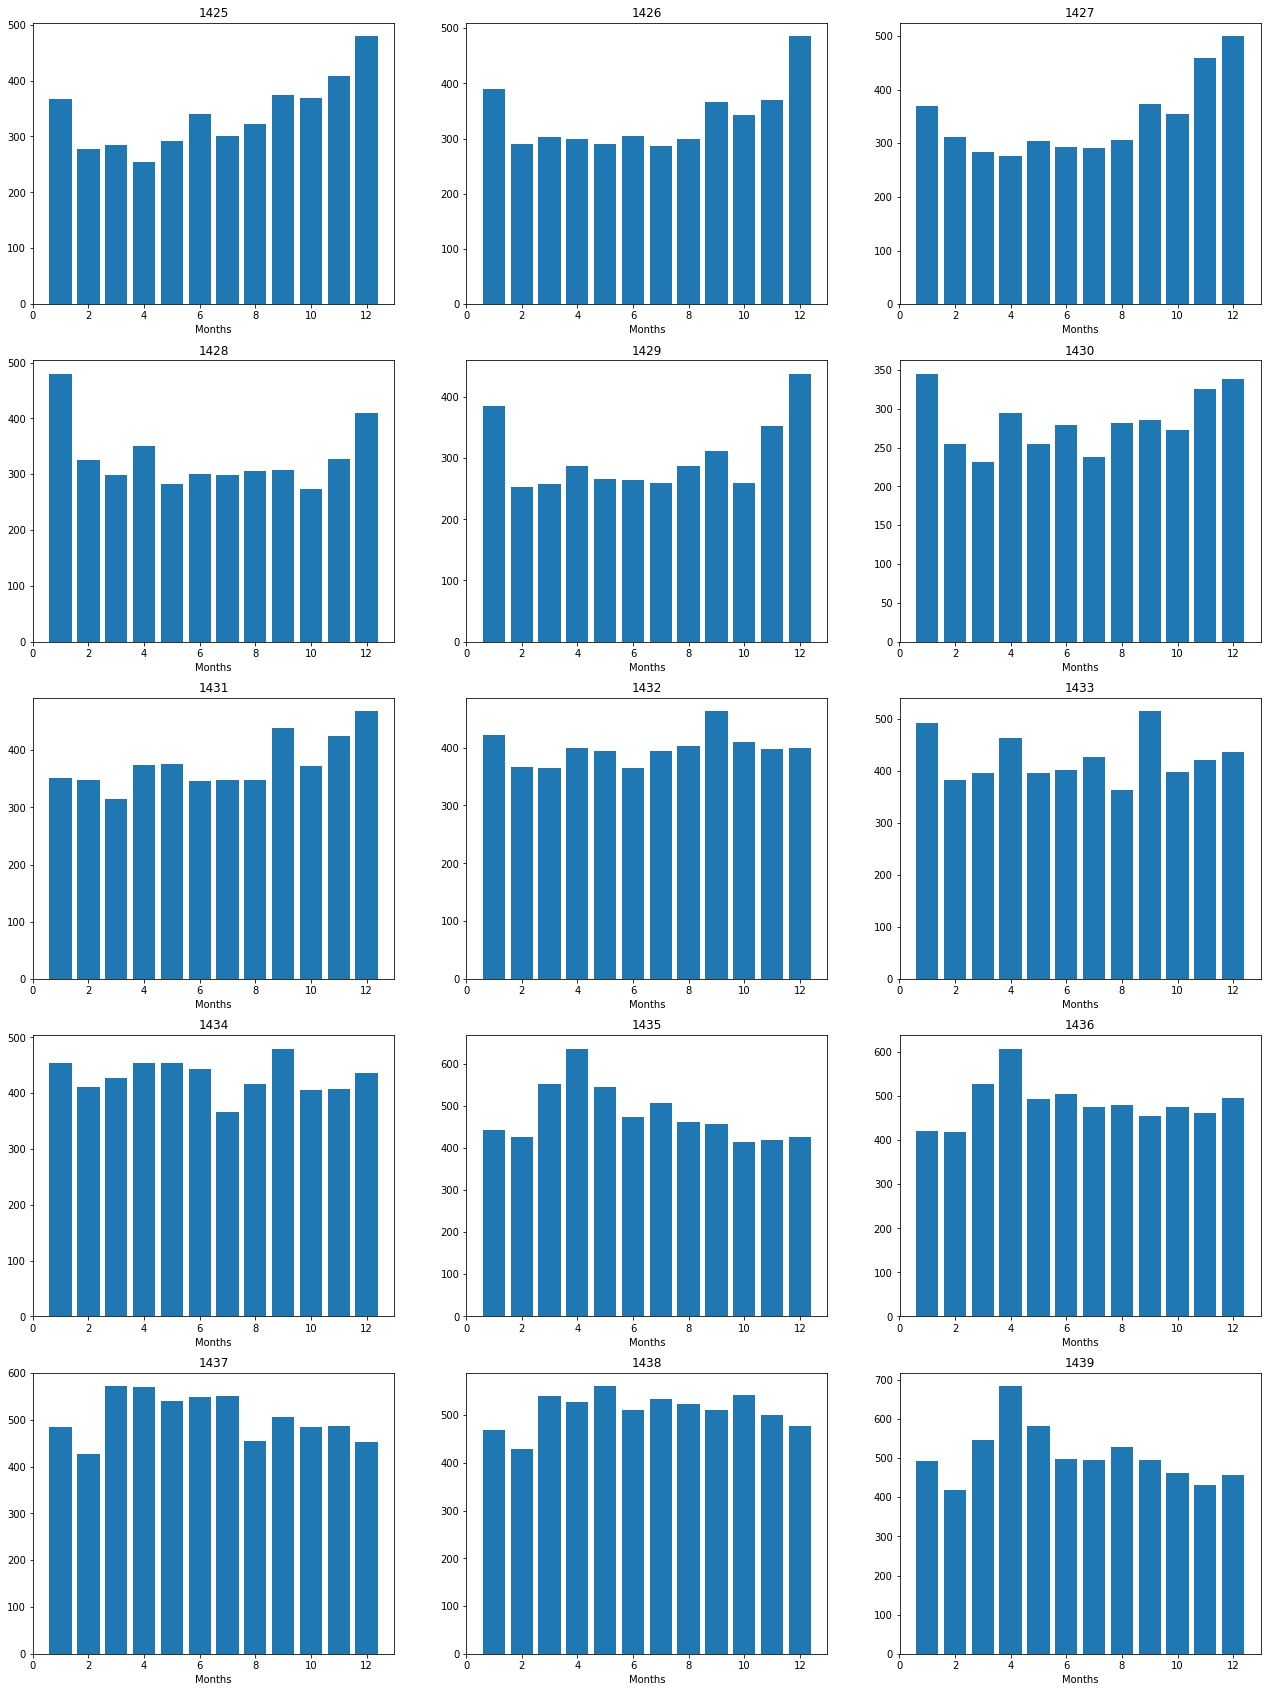

In [120]:

df_merge_all = df_merge.groupby(['year', 'month'], as_index=False )['count'].sum() 

list__ = []
list__.append(df_merge_all.year.unique()[0:3])
list__.append(df_merge_all.year.unique()[3:6])
list__.append(df_merge_all.year.unique()[6:9])
list__.append(df_merge_all.year.unique()[9:12])
list__.append(df_merge_all.year.unique()[12:15])

fig, ax = plt.subplots(5, 3, figsize=(22,30))


i = 0
rows = 5
cols = 3
for row in range(rows):
    for col in range(cols):
        ax[row, col].title.set_text(list__[row][col])
        ax[row, col].set_xlabel('Months')
        ax[row, col].bar(df_merge_all[df_merge_all['year'] == list__[row][col]].month, 
                         df_merge_all[df_merge_all['year'] == list__[row][col]]['count'])
        i += 1
        if i == len(df_merge_all.year.unique()):
            break
        
        



### As we can see there is no year with max deaths occured in Shaban month.

# Modeling 

In [ ]:
# Compute the mean of all months except Shaban, and Shaban month

In [131]:
from scipy import stats

df_merge_shaban = df_merge[df_merge['month'] == 8].groupby('year')['count'].sum() 
df_merge_others = df_merge[df_merge['month'] != 8].groupby('year')['count'].sum() 
df_merge_others = (df_merge_others / 11).astype('int32') # 11 is the number of months


# Control is all month excluding Shaban
# experimental is all Shaban across years
control = df_merge_others
experimental = df_merge_shaban

control.mean(), experimental.mean(), experimental.mean() - control.mean()


(404.46666666666664, 385.06666666666666, -19.399999999999977)

## We have found that the average of Shabans across 15 years is less than the average of other months, 
## we want to test if this difference by chance and prove if this difference statically signifence

- H0 : There is no difference 
- H1 : There is difference between Shaban and other months 

# We ecpect the P-value to be high, the hypothesis test significance level to be: 0.95

In [163]:
# Fast way with scipy.stats
# t_test_result = stats.ttest_ind(experimental, control, equal_var=False)
t_statistic = t_test_result[0]
t_test_result.statistic, t_test_result.pvalue
control.std(), experimental.std()
print('P-value : ', t_test_result[1])

(-0.63635854372752, 0.5297518833217733)

## We can't reject due to the high P-value, we will also do bootstraping due to the few number of samples we have.

In [135]:
deaths_shaban = df_merge_shaban.values
deaths_other = df_merge_others.values

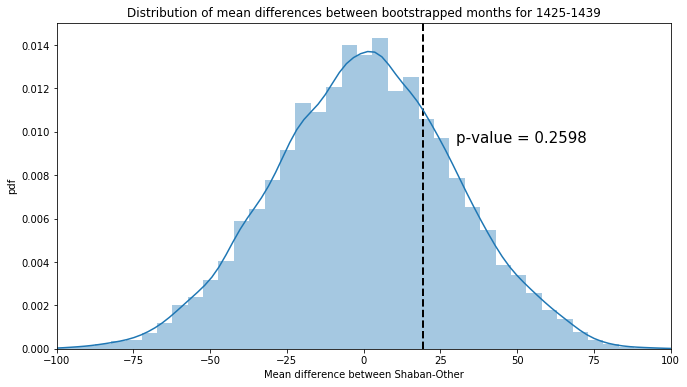

In [159]:
# let's try the bootstrap method, we should still get a p-value above our significance threshold
death_diff_mean = deaths_other.mean() - deaths_shaban.mean()
death_combined_mean = np.concatenate((deaths_shaban, deaths_other)).mean()

# adjust to new mean
deaths_per_shabans = deaths_shaban - deaths_shaban.mean() + death_combined_mean
deaths_per_others = deaths_other - deaths_other.mean() + death_combined_mean

#init lists and do random choice
shaban_replicates = np.empty(10000)
others_replicates = np.empty(10000)

np.random.seed(42)
for i in range(10000):
    shaban_replicates[i] = np.random.choice(deaths_per_shabans, size=len(deaths_per_shabans)).mean()
    others_replicates[i] = np.random.choice(deaths_per_others, size=len(deaths_per_others)).mean()

bs_diff = others_replicates - shaban_replicates 
plt.figure(figsize=(11,6))
plt.gca().set_xlim(-100,100)
plt.gca().set_xlabel('Mean difference between Shaban-Other')
plt.gca().set_ylabel('pdf')
plt.gca().set_title('Distribution of mean differences between bootstrapped months for 1425-1439')
plt.gca().axvline(death_diff_mean, color='black', lw=2, linestyle='--')
plt.gca().text(30, .0095, 'p-value = ' + str((bs_diff >= death_diff_mean).sum() / len(bs_diff)), fontsize=15)
sns.distplot(bs_diff, bins=40);


## After doing bootstrapping, we found also the P-value to be high, therefore, we can't reject the null hypothesis, so there is no difference between Shaban and other months in terms of deaths.

-------------------------------------------------------

-------------------------------------------------------

# We will test this belief on other dataset (Ahsaa Dataset)

### Data scraping

In [ ]:
url = 'https://www.alhasa.gov.sa/SitePages/GetObituary.aspx'

# create a new Firefox session
driver = webdriver.Chrome('D:/Documents/GitHub/SCFHS-Challenge/chromedriver.exe')
driver.implicitly_wait(10)
driver.get(url)
urls = []

In [ ]:
# We have to enter the date manually due to JS pop-up calander which will take sometime to handle it by selenuim, after that run this cell

table_ = []
death = []
nextt = True
i = 1
while nextt:
    try:
#         print('page number ', i)
        soup_level1= BeautifulSoup(driver.page_source, 'lxml')
        death1.append(soup_level1)
        driver.find_element_by_xpath('//*[@id="ctl00_SPWebPartManager1_g_f82b5b79_188a_4cdc_a21b_8d289061bf26_ctl00_Pager_LbNext"]').click()
        i += 1
    except:
        nextt = False

In [ ]:
names = []
sex = []
nationality = []
age = []
date_of_death = []
hospital = [] 
license = []

In [ ]:
i = 0
for table in death1:
    table = table.find('table', {'id': 'ctl00_SPWebPartManager1_g_f82b5b79_188a_4cdc_a21b_8d289061bf26_ctl00_grvResults'})
    table = table.findAll('tr')
    table = table[2::]
#     table = [table[i:i + n] for i in range(0, len(table), n)]
    for tr in table:
        try:
            names.append(tr.findAll('td')[0].text.strip())

        except:
            names.append('NA')
        
        try:
            sex.append(tr.findAll('td')[1].text.strip())
            
        except:
            sex.append('NA')
        
        try:
            nationality.append(tr.findAll('td')[2].text.strip())
        except:
            nationality.append('NA')
        
        try:
            age.append(tr.findAll('td')[3].text.strip())
        except:
            age.append('NA')
        
        try:
            date_of_death.append(tr.findAll('td')[4].text.strip())
        except:
            date_of_death.append('NA')
        
        try:
            hospital.append(tr.findAll('td')[5].text.strip())
        except:
            hospital.append('NA')
        
        try:
            license.append(tr.findAll('td')[6].text.strip())
        except:
            license.append('NA')

In [ ]:
# Export the scraped dataset 

df = pd.DataFrame({'name': names, 'sex': sex, 'nationality': nationality, 'age': age, 'date_of_death': date_of_death})
df.to_csv('ahsa-part2.csv',  encoding='utf-8-sig')

In [170]:
# Load the dataset after scraping from another notebook to save time
df_ahsaa = pd.read_csv('ahsa-part2.csv')

In [171]:
df_ahsaa.head()

,Unnamed: 0,name,sex,nationality,age,date_of_death
0,0,ناديه علي العمران,انثى,سعودي,35,1432/05/12
1,1,سعد فهد العمرين,ذكر,سعودي,50,1432/08/12
2,2,حسن محمد علي,ذكر,سوداني,31,1432/09/07
3,3,فاطمه عبدالله صالح البراهيم,انثى,سعودي,46,1432/09/07
4,4,فيصل علي باجمعان,ذكر,هندي,45,1432/02/14


# Data Cleaning 

In [173]:
# Show all NaN
df_ahsaa[pd.isnull(df_ahsaa).any(axis=1)] 

# Check missing in Date only
df_ahsaa['date_of_death'].isnull().any() 
df_ahsaa[pd.isnull(df_ahsaa['date_of_death'])][:5]

,Unnamed: 0,name,sex,nationality,age,date_of_death


In [174]:
# Check for duplicates, i'll drop duplicate by name and date since we have many similiarities in name in saudi arabia.

df_ahsaa[df_ahsaa.duplicated(['name', 'date_of_death'])] # duplicates are 394
df_ahsaa.drop_duplicates(inplace=True)
df_ahsaa[df_ahsaa.duplicated()]

,Unnamed: 0,name,sex,nationality,age,date_of_death


In [175]:
# Drop unnecessary columns
df_ahsaa.columns
df_ahsaa.drop(['Unnamed: 0'], axis=1, inplace=True)

In [176]:
# I will extract (y, m) manually

df_ahsaa['year'] = df_ahsaa['date_of_death'].apply(lambda x: x.split('/')[0])
df_ahsaa['month'] = df_ahsaa['date_of_death'].apply(lambda x: x.split('/')[1])
df_ahsaa['day'] = df_ahsaa['date_of_death'].apply(lambda x: x.split('/')[2])


df_ahsaa.month.replace({'01': 1, '02': 2, '03':3, '04':4,'05':5 ,'06':6, '07':7,'08':8, '09': 9 }, inplace=True)
df_ahsaa.day.replace({'01': 1, '02': 2, '03':3, '04':4,'05':5 ,'06':6, '07':7,'08':8, '09': 9 }, inplace=True)


df_ahsaa['year'] = df_ahsaa['year'].astype('int32')
df_ahsaa['month'] = df_ahsaa['month'].astype('int32')
df_ahsaa['day'] = df_ahsaa['day'].astype('int32')

In [177]:
df_ahsaa.head()

,name,sex,nationality,age,date_of_death,year,month,day
0,ناديه علي العمران,انثى,سعودي,35,1432/05/12,1432,5,12
1,سعد فهد العمرين,ذكر,سعودي,50,1432/08/12,1432,8,12
2,حسن محمد علي,ذكر,سوداني,31,1432/09/07,1432,9,7
3,فاطمه عبدالله صالح البراهيم,انثى,سعودي,46,1432/09/07,1432,9,7
4,فيصل علي باجمعان,ذكر,هندي,45,1432/02/14,1432,2,14


In [ ]:
df_ahsaa.year.

In [181]:
# Max deaths happend in which month of each year?
# Expected result should be near one if deaths across months are equals.
# df_max = df_merge.groupby(['year', 'month'], as_index=False).sum()
# df_merge.year.unique()

years = []
months = []
count = []

s = 0
e = 12
df_ahsaa['count'] = 1
for year in range(round(len(df_ahsaa.groupby(['year', 'month'])['count'].sum()) / 12)):
    dd = df_ahsaa.groupby(['year', 'month'], as_index=False)['count'].sum()[s:e]
#     display(dd[dd['count'] == dd['count'].values.max()])
    years.append(dd[dd['count'] == dd['count'].values.max()]['year'].values[0])
    months.append(dd[dd['count'] == dd['count'].values.max()]['month'].values[0])
    count.append(dd[dd['count'] == dd['count'].values.max()]['count'].values[0])
    s += 12
    e += 12

In [182]:
df_count = pd.DataFrame({'year': years, 'month': months, 'count': count})

In [183]:
df_count

,year,month,count
0,1432,4,197
1,1433,11,260
2,1434,12,211
3,1435,10,476
4,1436,1,362
5,1437,4,157


In [185]:
# Average deaths per month (No/11), and No of death in Shaban 

df_merge_shaban = df_ahsaa[df_ahsaa['month'] == 8].groupby('year')['count'].sum() 
df_merge_others = df_ahsaa[df_ahsaa['month'] != 8].groupby('year')['count'].sum() 
df_merge_others = (df_merge_others / 11).astype('int32') # 11 is the number of months


# Avg of Shaban across 11 years
print('Avg of Shaban across 5 years : ', round(df_merge_shaban.mean()).astype('int32'))


# Avg of No. of death across 11 years of 11 months.
print('Avg of No. of death across 5 years of 11 months : ',  round(df_merge_others.mean()).astype('int32') ) 

Avg of Shaban across 15 years :  185
Avg of No. of death across 15 years of 11 months :  172


In [ ]:
# As we can see, there is a difference bet

# Time is up :)